In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.manifold import TSNE
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from tqdm import tqdm
import glob
import os
import json
import pickle
from einops import rearrange

C:\Users\saeed\Desktop\Master\bci\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'''all:
with open("data/all/X_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/all/X_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/all/y_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/all/y_test.pkl", "rb") as f:
    y__test = pickle.load(f)
    
    vowel:
with open("data/vowel/X_vowel_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/vowel/X_vowel_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/vowel/y_vowel_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/vowel/y_vowel_test.pkl", "rb") as f:
    y__test = pickle.load(f)
    
    nasal:
with open("data/nasal/X_nasal_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/nasal/X_nasal_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/nasal/y_nasal_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/nasal/y_nasal_test.pkl", "rb") as f:
    y__test = pickle.load(f)
    
    bilabial:
with open("data/bilabial/X_bilabial_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/bilabial/X_bilabial_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/bilabial/y_bilabial_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/bilabial/y_bilabial_test.pkl", "rb") as f:
    y__test = pickle.load(f)
    
    iy:
with open("data/iy/X_iy_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/iy/X_iy_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/iy/y_iy_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/iy/y_iy_test.pkl", "rb") as f:
    y__test = pickle.load(f)
    
    uw:
with open("data/uw/X_uw_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/uw/X_uw_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/uw/y_uw_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/uw/y_uw_test.pkl", "rb") as f:
    y__test = pickle.load(f)

In [6]:
#load train and test data and labels
with open("data/uw/X_uw_train.pkl", "rb") as f:
    X__train = pickle.load(f)
with open("data/uw/X_uw_test.pkl", "rb") as f:
    X__test = pickle.load(f)
with open("data/uw/y_uw_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/uw/y_uw_test.pkl", "rb") as f:
    y__test = pickle.load(f)
print(X__train.shape, X__test.shape, len(y__train), len(y__test))

(1721, 62, 1250) (192, 62, 1250) 1721 192


In [7]:
#set parameters for MFCC extraction
n_mfcc = 20
framesize = 1 * 250
hop_size = int(framesize/2)

#calculate MFCCs and put them in a matrix with shape (#trial, #channels) for each sub. put all new subs in MFCC_data 
trials = []
for i, trial in enumerate(tqdm(X__train)):
    channels = []
    for j, channel in enumerate(trial):
        mfccs = librosa.feature.mfcc(y=channel, n_mfcc=n_mfcc, n_fft=framesize, hop_length=hop_size, sr=250)
        channels.append(np.array(mfccs))
    trials.append(np.array(channels)) 
mfc_train = np.array(trials)
trials = []
for i, trial in enumerate(tqdm(X__test)):
    channels = []
    for j, channel in enumerate(trial):
        mfccs = librosa.feature.mfcc(y=channel, n_mfcc=n_mfcc, n_fft=framesize, hop_length=hop_size, sr=250)
        channels.append(np.array(mfccs))
    trials.append(np.array(channels)) 
mfc_test = np.array(trials)
print(mfc_train.shape, mfc_test.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 192/192 [00:46<00:00,  4.17it/s]

(1721, 62, 20, 11) (192, 62, 20, 11)


In [8]:
mfc_train1 = mfc_train[:,:,0:10,:]
mfc_test1 = mfc_test[:,:,0:10,:]
print(mfc_train1.shape, mfc_test1.shape)

(1721, 62, 10, 11) (192, 62, 10, 11)


In [9]:
with open('uw_20mfc_train.pkl', 'wb') as f:
    pickle.dump(mfc_train1, f)
with open('uw_20mfc_test.pkl', 'wb') as f:
    pickle.dump(mfc_test1, f)

In [188]:
with open('bilab_20mfc_train.pkl', 'rb') as f:
    mfc_train = pickle.load(f)
with open('bilab_20mfc_test.pkl', 'rb') as f:
    mfc_test = pickle.load(f)
with open("data/bilabial/y_bilabial_train.pkl", "rb") as f:
    y__train = pickle.load(f)
with open("data/bilabial/y_bilabial_test.pkl", "rb") as f:
    y__test = pickle.load(f)

In [2]:
with open("data/normal_all_data.pkl", "rb") as f:
    all_data = pickle.load(f)
with open("data/11_20mfc.pkl", "rb") as f:
    mfc_data = pickle.load(f)
with open("data/all_label.pkl", "rb") as f:
    labels = pickle.load(f)
with open("data/vowel_label.pkl", "rb") as f:
    vowel_label = pickle.load(f)
with open("data/bilab_label.pkl", "rb") as f:
    bilab_label = pickle.load(f)
with open("data/nasal_label.pkl", "rb") as f:
    nasal_label = pickle.load(f)
with open("data/iy_label.pkl", "rb") as f:
    iy_label = pickle.load(f)
with open("data/uw_label.pkl", "rb") as f:
    uw_label = pickle.load(f)

print(mfc_data.shape)

(1913, 62, 20, 11)


In [3]:
sum(nasal_label)/len(nasal_label)

0.36382645060115004

In [189]:
mfc_train = mfc_train[:,:,2:12,:]
mfc_test = mfc_test[:,:,2:12,:]
mfc_train.shape

(1721, 62, 10, 11)

In [197]:
data = mfc_train[:,:,:10,:]
data = rearrange(data, 'n c m t -> n (c m t)')
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(data)

C:\Users\saeed\Desktop\Master\bci\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\saeed\Desktop\Master\bci\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


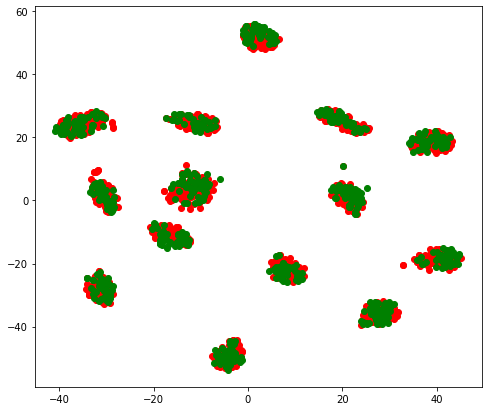

In [198]:
l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11 = [], [], [], [], [], [], [], [], [], [], []
for i, label in enumerate(y__train):
    if label==0:
        l1.append(X[i])
    elif label==1:
        l2.append(X[i])
    elif label==2:
        l3.append(X[i])
    elif label==3:
        l4.append(X[i])
    elif label==4:
        l5.append(X[i])
    elif label==5:
        l6.append(X[i])
    elif label==6:
        l7.append(X[i])
    elif label==7:
        l8.append(X[i])
    elif label==8:
        l9.append(X[i])
    elif label==9:
        l10.append(X[i])
    elif label==10:
        l11.append(X[i])
plt.figure(figsize=(8, 7))
for x in l1:
    plt.scatter(x[0], x[1], c='r')
for x in l2:
    plt.scatter(x[0], x[1], c='g')
for x in l3:
    plt.scatter(x[0], x[1], c='b')
for x in l4:
    plt.scatter(x[0], x[1], c='c')
for x in l5:
    plt.scatter(x[0], x[1], c='y')
for x in l6:
    plt.scatter(x[0], x[1], c='m')
for x in l7:
    plt.scatter(x[0], x[1], c='k')
for x in l8:
    plt.scatter(x[0], x[1], c='w')
for x in l9:
    plt.scatter(x[0], x[1], c='orange')
for x in l10:
    plt.scatter(x[0], x[1], c='purple')
for x in l11:
    plt.scatter(x[0], x[1], c='bisque')
plt.show()


In [20]:
a = np.array([[1,1,1,1],[2,2,2,4],[5,5,5,9]])
np.histogram(a)

(array([4, 3, 0, 1, 0, 3, 0, 0, 0, 1], dtype=int64),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]))

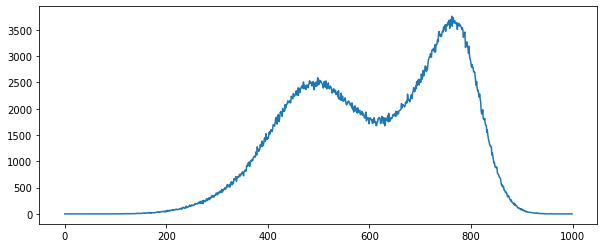

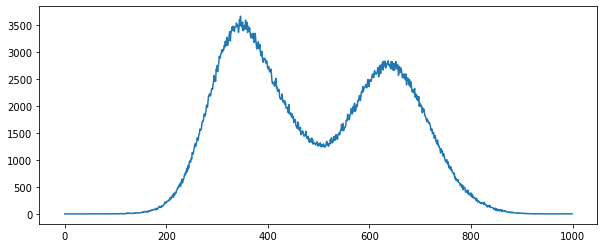

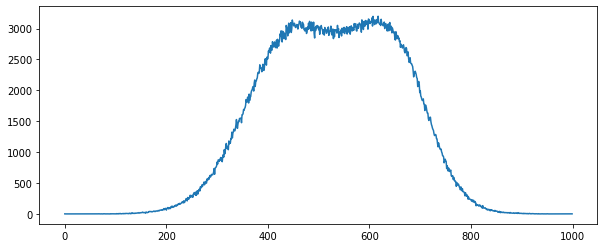

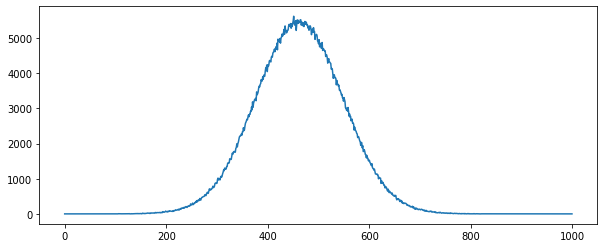

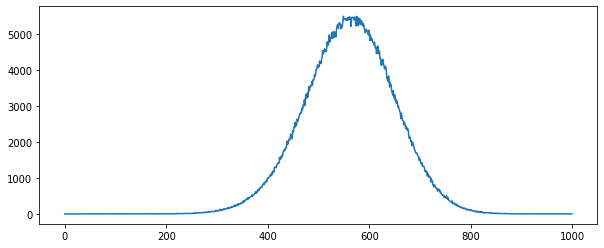

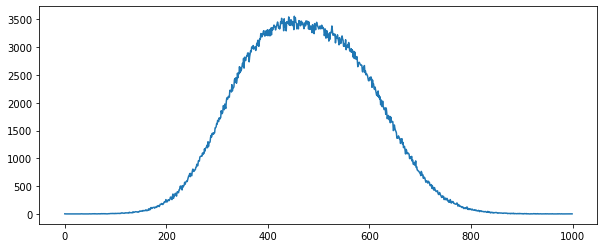

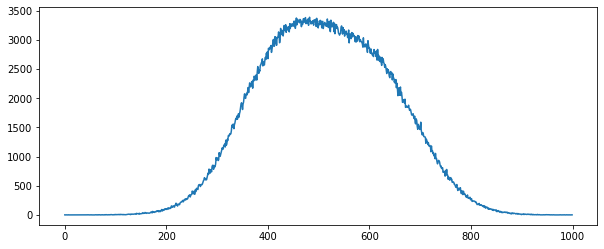

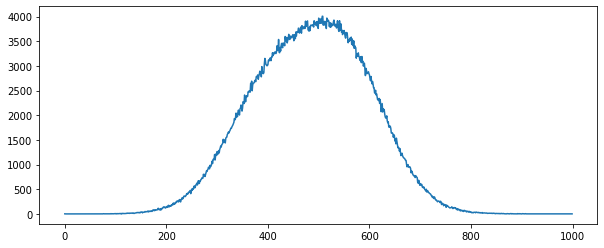

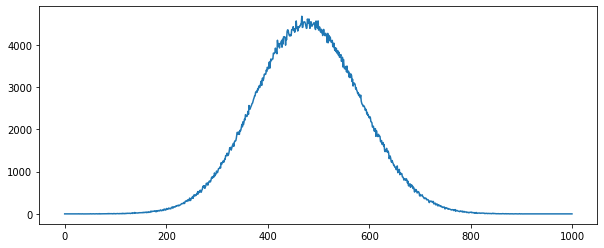

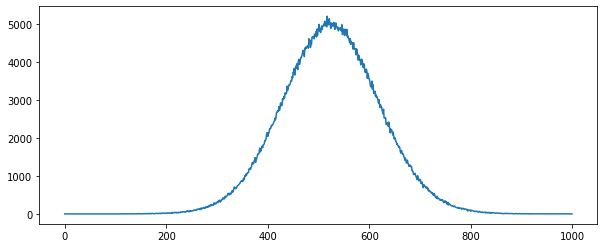

In [190]:
data = rearrange(mfc_train, 'n c m t -> m (n c t)')
for m in data:
    plt.figure(figsize=(10, 4))
    hist = np.histogram(m, bins=1000)
    plt.plot(hist[0])

In [5]:
all_data.shape

(1913, 62, 20, 11)

In [5]:

trials = []
for trial in all_data:
    pic = np.zeros((7,9,20,11))
    pic[0,2] = trial[3]
    pic[0,3] = trial[0]
    pic[0,4] = trial[1]
    pic[0,5] = trial[2]
    pic[0,6] = trial[4]
    pic[1,:] = trial[5:14]
    pic[2,:] = trial[14:23]
    pic[3,:] = trial[23:32]
    pic[4,:] = trial[32:41]
    pic[5,:] = trial[41:50]
    pic[6,0] = trial[50]
    pic[6,1] = trial[51]
    pic[6,2] = trial[52]
    pic[6,3] = trial[58]
    pic[6,4] = trial[53]
    pic[6,5] = trial[60]
    pic[6,6] = trial[54]
    pic[6,7] = trial[55]
    pic[6,8] = trial[56]
    trials.append(pic)
picture_data_train = np.array(trials)
'''trials = []
for trial in mfc_test:
    pic = np.zeros((7,9,10,11))
    pic[0,2] = trial[3]
    pic[0,3] = trial[0]
    pic[0,4] = trial[1]
    pic[0,5] = trial[2]
    pic[0,6] = trial[4]
    pic[1,:] = trial[5:14]
    pic[2,:] = trial[14:23]
    pic[3,:] = trial[23:32]
    pic[4,:] = trial[32:41]
    pic[5,:] = trial[41:50]
    pic[6,0] = trial[50]
    pic[6,1] = trial[51]
    pic[6,2] = trial[52]
    pic[6,3] = trial[58]
    pic[6,4] = trial[53]
    pic[6,5] = trial[60]
    pic[6,6] = trial[54]
    pic[6,7] = trial[55]
    pic[6,8] = trial[56]
    trials.append(pic)  
picture_data_test = np.array(trials)'''

'trials = []\nfor trial in mfc_test:\n    pic = np.zeros((7,9,10,11))\n    pic[0,2] = trial[3]\n    pic[0,3] = trial[0]\n    pic[0,4] = trial[1]\n    pic[0,5] = trial[2]\n    pic[0,6] = trial[4]\n    pic[1,:] = trial[5:14]\n    pic[2,:] = trial[14:23]\n    pic[3,:] = trial[23:32]\n    pic[4,:] = trial[32:41]\n    pic[5,:] = trial[41:50]\n    pic[6,0] = trial[50]\n    pic[6,1] = trial[51]\n    pic[6,2] = trial[52]\n    pic[6,3] = trial[58]\n    pic[6,4] = trial[53]\n    pic[6,5] = trial[60]\n    pic[6,6] = trial[54]\n    pic[6,7] = trial[55]\n    pic[6,8] = trial[56]\n    trials.append(pic)  \npicture_data_test = np.array(trials)'

In [4]:
all_data.shape

(1913, 62, 20, 11)

In [6]:
picture_data_train.shape

(1913, 7, 9, 20, 11)

In [7]:
print(picture_data_train.shape, picture_data_test.shape)

NameError: name 'picture_data_test' is not defined

In [8]:
dataset = picture_data_train
labels = nasal_label

In [193]:
#concat train and test data. concat train and test labels

dataset = []
for data in picture_data_train:
    dataset.append(data)
for data in picture_data_test:
    dataset.append(data)

labels = y__train + y__test
    
print(mfc_train.shape, len(dataset), dataset[0].shape, len(labels))

(1721, 62, 10, 11) 1913 (7, 9, 10, 11) 1913


In [9]:
#config
val_size = 0.15
n_epochs = 100
batch_size = 128
print_every = 10
k = 10
skf=StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [10]:
#model

class CNN_RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(20, 16, 3)
        #torch.nn.init.xavier_normal_(self.conv1.weight)
        self.pool = nn.MaxPool2d(2, 1)
        self.conv2 = nn.Conv2d(16, 32, 3)
        #torch.nn.init.xavier_normal_(self.conv2.weight)
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=2, batch_first=True)
        self.fc = nn.Linear(128, 2)
        #torch.nn.init.xavier_normal_(self.fc.weight)
        self.batch1 = nn.BatchNorm2d(16)
        self.batch2 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
    
    
    def forward(self, x):
        hidden = torch.zeros(2, x.shape[0], 128), torch.zeros(2, x.shape[0], 128)
        # (batch, heigth, width, feature, time)
        #print(x.shape)
        x = rearrange(x, 'batch heigth width feature time -> (batch time) feature heigth width')
        #print(x.shape)
        out = self.pool(self.relu1(self.batch1(self.conv1(x))))
        #print(out.shape)
        out = self.relu2(self.batch2(self.conv2(out)))
        #print(out.shape)
        out = rearrange(out, '(batch time) channel heigth width -> batch time (channel heigth width)', time=11)
        #print(out.shape)
        out, hidden = self.lstm(out, hidden) 
        out = out[:,-1,:]
        out = self.fc(out)
        return out
    
class FC(nn.Module):
    def __init__(self, hidden1=500):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(6820, hidden1)
        torch.nn.init.xavier_normal(self.fc1.weight)
        self.fc2 = nn.Linear(hidden1, 1)
        torch.nn.init.xavier_normal(self.fc2.weight)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = x.view(-1, 6820)
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = F.sigmoid(self.fc2(x))
        return x

In [11]:
train_accs, test_accs = [], []
train_accs_over, test_accs_over = [], []
train_accs_acc, test_accs_acc = [], []

for fold, (train_val_idx, test_idx) in enumerate(skf.split(dataset, labels)):
    
    print('-----------------------------Fold {}---------------'.format(fold + 1))

    
    print('preparing dataloaders...')
    train_val_data = np.stack([dataset[index] for index in train_val_idx])
    train_val_label = [labels[index] for index in train_val_idx]
    test_data = np.stack([dataset[index] for index in test_idx])
    test_label = [labels[index] for index in test_idx]
    
    
    Max = np.max(train_val_data, axis=(0,1,2,4), keepdims=True)
    Min = np.min(train_val_data, axis=(0,1,2,4), keepdims=True)
    train_val_data = (train_val_data-Min)/(Max-Min)
    
    Max_test = np.max(test_data, axis=(0,1,2,4), keepdims=True)
    Min_test = np.min(test_data, axis=(0,1,2,4), keepdims=True)
    test_data = (test_data-Min)/(Max-Min)
    
    
    train_val = [[train_val_data[i], train_val_label[i]] for i in range(len(train_val_data))]
    test = [[test_data[i], test_label[i]] for i in range(len(test_data))]
    
    num_train_val = len(train_val)
    indices = list(range(num_train_val))
    np.random.shuffle(indices)
    split = int(np.floor(val_size*num_train_val))
    train, val = [train_val[i] for i in indices[split:]] ,[train_val[i] for i in indices[:split]]
    
    train_labels = [data[1] for data in train]
    
    oversample = 1
    _, counts = np.unique(train_labels, return_counts=True)
    if oversample==1:
        if counts[1]>counts[0]:
            label0 = [data for data in train if data[1]==0]
            coef = int(counts[1]/counts[0])
            print('coef when 1 > 0', coef)
            for i in range(coef):
                train = train + label0
        elif counts[1]<counts[0]:
            label1 = [data for data in train if data[1]==1]
            coef = int(counts[0]/counts[1])
            print('coef when 0 > 1', coef)
            for i in range(coef):
                train = train + label1
    

    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True)
    
    print('creating model...')
    model = CNN_RNN().float()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    criterion = nn.CrossEntropyLoss()
    
    print('calculating total steps...')
    steps = 0
    for epoch in range(n_epochs):
        for data, label in train_loader:
            steps += 1

    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, total_steps=steps, max_lr=0.001)
    scheduler1 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    l1_lambda = 0.0001
    
    min_val_loss = np.inf
    max_val_acc = 0
    
    for epoch in range(n_epochs):
        print('epoch: ', epoch+1)
        train_loss = 0
        l1_loss = 0
        train_correct = 0
        model.train()
        '''for name, param in model.named_parameters():
                print(name, param.data)
                break'''
        for iteration, (data,label) in enumerate(train_loader):
            #print('\ndata = ', torch.amax(data, axis=(0,1,2,4)), torch.amin(data, axis=(0,1,2,4)))
            optimizer.zero_grad()
            output = model(data.float())
            '''label = torch.reshape(label, (-1,1))
            label = label.float()'''
            loss = criterion(output, label)
            add_loss = loss
            ex_loss = 0
            for W in model.parameters():
                ex_loss += l1_lambda*W.norm(1)
                loss = loss + l1_lambda*W.norm(1)    
            loss.backward()
            optimizer.step()
            scheduler.step()
            #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
            targets = sum(torch.argmax(output,dim=1)==label)
            train_correct += targets
            train_loss += add_loss.item()*data.shape[0]
            l1_loss += ex_loss.item()*data.shape[0]
            
            if iteration % print_every == 0:
                is_training = True
                val_loss = 0
                val_correct = 0
                model.eval()
                for data, label in val_loader:
                    output = model(data.float())
                    '''label = torch.reshape(label, (-1,1))
                    label = label.float()'''
                    loss = criterion(output, label) 
                    val_loss += loss.item()*data.shape[0]
                    #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
                    targets = sum(torch.argmax(output,dim=1)==label)
                    val_correct += targets
                val_loss = val_loss/len(val_loader.sampler)
                val_acc = val_correct/len(val_loader.sampler)

                if val_loss <= min_val_loss:
                    print("validation loss decreased ({:.6f} ---> {:.6f}),   val_acc = {}".format(min_val_loss, val_loss, val_acc))
                    torch.save(model.state_dict(), 'captum/nasal/model'+str(fold)+'.pt')
                    min_val_loss = val_loss
                if val_acc >= max_val_acc:
                    print("validation acc increased ({:.6f} ---> {:.6f})".format(max_val_acc, val_acc))
                    torch.save(model.state_dict(), 'captum/nasal/model'+str(fold)+'_acc.pt')
                    max_val_acc = val_acc
                torch.save(model.state_dict(), 'captum/nasal/last_model'+str(fold)+'.pt')
                model.train(mode=is_training)
                
        train_acc = train_correct/len(train_loader.sampler)       
        train_loss = train_loss/len(train_loader.sampler)
        loss1 = l1_loss/len(train_loader.sampler)
        
        val_loss = 0
        val_correct = 0
        model.eval()
        for data, label in val_loader:
            output = model(data.float())
            '''label = torch.reshape(label, (-1,1))
            label = label.float()'''
            loss = criterion(output, label) 
            val_loss += loss.item()*data.shape[0]
            #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
            targets = sum(torch.argmax(output,dim=1)==label)
            val_correct += targets
            
        val_loss = val_loss/len(val_loader.sampler)
        val_acc = val_correct/len(val_loader.sampler)
        
        print('epoch {}: train loss = {},   l1loss = {},   train acc = {},\nval_loss = {},     val_acc = {}\n'
              .format(epoch+1, train_loss, loss1, train_acc, val_loss, val_acc))
        if int(train_acc)==1:
            print('!!! overfitted !!!')
            break
        model.train()
        #scheduler1.step(val_loss)
            
    model =CNN_RNN().float()
    model.load_state_dict(torch.load('captum/nasal/model'+str(fold)+'.pt'))
    
    n_correct = 0
    model.eval()
    for data, label in test_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        print(targets)
        n_correct += targets
        
    test_accs.append(n_correct/len(test_loader.sampler))
    print('early stoping results:\n\t', test_accs)
    
    n_correct = 0
    model.eval()
    for data, label in train_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        n_correct += targets
        
    train_accs.append(n_correct/len(train_loader.sampler))
    print('\t', train_accs)
    
    model = CNN_RNN().float()
    model.load_state_dict(torch.load('captum/nasal/last_model'+str(fold)+'.pt'))
    
    n_correct = 0
    model.eval()
    for data, label in test_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        print(targets)
        n_correct += targets
    test_accs_over.append(n_correct/len(test_loader.sampler))
    print('full train results:\n\t', test_accs_over)
    
    n_correct = 0
    model.eval()
    for data, label in train_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        n_correct += targets
    train_accs_over.append(n_correct/len(train_loader.sampler))
    print('\t', train_accs_over)
    
    model = CNN_RNN().float()
    model.load_state_dict(torch.load('captum/nasal/model'+str(fold)+'_acc.pt'))
    
    n_correct = 0
    model.eval()
    for data, label in test_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        print(targets)
        n_correct += targets
    test_accs_acc.append(n_correct/len(test_loader.sampler))
    print('best accs results:\n\t', test_accs_acc)
    
    n_correct = 0
    model.eval()
    for data, label in train_loader:
        output = model(data.float())
        #targets = [1 if output[i].round()==label[i] else 0 for i in range(len(label))]
        targets = sum(torch.argmax(output,dim=1)==label)
        n_correct += targets
    train_accs_acc.append(n_correct/len(train_loader.sampler))
    print('\t', train_accs_acc)
    print(test_label)

-----------------------------Fold 1---------------
preparing dataloaders...
coef when 0 > 1 1
creating model...
calculating total steps...
epoch:  1
validation loss decreased (inf ---> 0.703975),   val_acc = 0.39534884691238403
validation acc increased (0.000000 ---> 0.395349)
validation acc increased (0.395349 ---> 0.395349)
epoch 1: train loss = 0.6921196075978445,   l1loss = 1.4813192892626534,   train acc = 0.5274282693862915,
val_loss = 0.7102676463681598,     val_acc = 0.39534884691238403

epoch:  2
validation acc increased (0.395349 ---> 0.395349)
validation acc increased (0.395349 ---> 0.395349)
epoch 2: train loss = 0.6915809742517668,   l1loss = 1.4611903595816387,   train acc = 0.5274282693862915,
val_loss = 0.7109477325927379,     val_acc = 0.39534884691238403

epoch:  3
validation acc increased (0.395349 ---> 0.395349)
validation acc increased (0.395349 ---> 0.395349)
epoch 3: train loss = 0.6911844878743867,   l1loss = 1.4379649762238578,   train acc = 0.5274282693862915,

coef when 0 > 1 1
creating model...
calculating total steps...
epoch:  1
validation loss decreased (inf ---> 0.685728),   val_acc = 0.643410861492157
validation acc increased (0.000000 ---> 0.643411)
validation acc increased (0.643411 ---> 0.643411)
epoch 1: train loss = 0.6923627504481037,   l1loss = 1.486846898458096,   train acc = 0.5132699012756348,
val_loss = 0.6893179130184558,     val_acc = 0.643410861492157

epoch:  2
validation acc increased (0.643411 ---> 0.643411)
epoch 2: train loss = 0.690640912243409,   l1loss = 1.4669305257458178,   train acc = 0.5353029370307922,
val_loss = 0.6956856370896332,     val_acc = 0.3759689927101135

epoch:  3
epoch 3: train loss = 0.6898900556098716,   l1loss = 1.4436278268582952,   train acc = 0.5348021984100342,
val_loss = 0.7077792864437251,     val_acc = 0.356589138507843

epoch:  4
epoch 4: train loss = 0.6896268491692464,   l1loss = 1.41467766739096,   train acc = 0.5348021984100342,
val_loss = 0.716421481712844,     val_acc = 0.3565891

validation acc increased (0.321705 ---> 0.321705)
epoch 7: train loss = 0.6860224290835417,   l1loss = 1.271995098854704,   train acc = 0.5413758754730225,
val_loss = 0.7287569512692533,     val_acc = 0.3217054307460785

epoch:  8
validation acc increased (0.321705 ---> 0.321705)
validation acc increased (0.321705 ---> 0.321705)
epoch 8: train loss = 0.6840933574993138,   l1loss = 1.2031428917336202,   train acc = 0.5413758754730225,
val_loss = 0.7273619147234185,     val_acc = 0.3217054307460785

epoch:  9
validation acc increased (0.321705 ---> 0.321705)
validation acc increased (0.321705 ---> 0.321705)
epoch 9: train loss = 0.6811107120746868,   l1loss = 1.1223840780058507,   train acc = 0.5488534569740295,
val_loss = 0.7214035119197165,     val_acc = 0.3682170510292053

epoch:  10
validation acc increased (0.321705 ---> 0.368217)
validation acc increased (0.368217 ---> 0.379845)
epoch 10: train loss = 0.6758952574620575,   l1loss = 1.0303770931268619,   train acc = 0.59471583366394

validation acc increased (0.325581 ---> 0.325581)
validation acc increased (0.325581 ---> 0.325581)
epoch 9: train loss = 0.6859321622168673,   l1loss = 1.1123363999046334,   train acc = 0.5403788685798645,
val_loss = 0.7276398294655851,     val_acc = 0.3255814015865326

epoch:  10
validation acc increased (0.325581 ---> 0.325581)
validation acc increased (0.325581 ---> 0.325581)
epoch 10: train loss = 0.6838702996849182,   l1loss = 1.0172734350887158,   train acc = 0.5403788685798645,
val_loss = 0.728483495324157,     val_acc = 0.3294573724269867

epoch:  11
validation acc increased (0.325581 ---> 0.329457)
validation loss decreased (0.699053 ---> 0.696120),   val_acc = 0.4883720874786377
validation acc increased (0.329457 ---> 0.488372)
epoch 11: train loss = 0.6797237210235709,   l1loss = 0.9119024760464015,   train acc = 0.5677965879440308,
val_loss = 0.6912261903748032,     val_acc = 0.5077519416809082

epoch:  12
validation loss decreased (0.696120 ---> 0.692533),   val_acc = 0.5

epoch 13: train loss = 0.637912023097502,   l1loss = 0.7075121821023955,   train acc = 0.6392946839332581,
val_loss = 0.7158694054729254,     val_acc = 0.4922480583190918

epoch:  14
epoch 14: train loss = 0.606015481966869,   l1loss = 0.5979608490425034,   train acc = 0.6806045174598694,
val_loss = 0.7537827140601107,     val_acc = 0.5852712988853455

epoch:  15
epoch 15: train loss = 0.5577827427189056,   l1loss = 0.49493083063541193,   train acc = 0.7193954586982727,
val_loss = 0.7263471793758777,     val_acc = 0.565891444683075

epoch:  16
epoch 16: train loss = 0.4718546643965791,   l1loss = 0.40398407203124215,   train acc = 0.7874055504798889,
val_loss = 1.424316991669263,     val_acc = 0.41860464215278625

epoch:  17
epoch 17: train loss = 0.3839408636843828,   l1loss = 0.3292035478038211,   train acc = 0.8372796177864075,
val_loss = 1.0002119476481002,     val_acc = 0.5193798542022705

epoch:  18
epoch 18: train loss = 0.3173008106217276,   l1loss = 0.27490125777439145,   trai

epoch 16: train loss = 0.4664823236831332,   l1loss = 0.39368396988484183,   train acc = 0.7918756008148193,
val_loss = 0.9508252638254979,     val_acc = 0.5968992114067078

epoch:  17
epoch 17: train loss = 0.3485482805889612,   l1loss = 0.32071299114102947,   train acc = 0.8515546917915344,
val_loss = 1.4121340199034342,     val_acc = 0.43023255467414856

epoch:  18
epoch 18: train loss = 0.2641293948428442,   l1loss = 0.26571550107408787,   train acc = 0.8966900706291199,
val_loss = 2.8454202820164287,     val_acc = 0.356589138507843

epoch:  19
epoch 19: train loss = 0.2165779782872023,   l1loss = 0.23378948680496026,   train acc = 0.9132397174835205,
val_loss = 1.407352695169375,     val_acc = 0.5193798542022705

epoch:  20
epoch 20: train loss = 0.14256087192890038,   l1loss = 0.21813757950766993,   train acc = 0.9538615942001343,
val_loss = 1.7007370909979178,     val_acc = 0.4883720874786377

epoch:  21
epoch 21: train loss = 0.0572467178868554,   l1loss = 0.20835738851050795, 

epoch 22: train loss = 0.03162910269686077,   l1loss = 0.2640630051963266,   train acc = 0.9929965138435364,
val_loss = 2.8269113385400106,     val_acc = 0.41472867131233215

epoch:  23
epoch 23: train loss = 0.02073831153961794,   l1loss = 0.25253280331606626,   train acc = 0.9969984889030457,
val_loss = 1.9658752079157866,     val_acc = 0.604651153087616

epoch:  24
epoch 24: train loss = 0.012647862177856524,   l1loss = 0.24088280176508123,   train acc = 0.9984992742538452,
val_loss = 2.1244828877320816,     val_acc = 0.5348837375640869

epoch:  25
epoch 25: train loss = 0.006505623935028098,   l1loss = 0.2303655490748819,   train acc = 1.0,
val_loss = 2.1552340097205582,     val_acc = 0.4961240291595459

!!! overfitted !!!
tensor(80)
tensor(42)
early stoping results:
	 [tensor(0.5833), tensor(0.6354), tensor(0.3646), tensor(0.6126), tensor(0.6335), tensor(0.5131), tensor(0.6387)]
	 [tensor(0.5737), tensor(0.4652), tensor(0.5414), tensor(0.5115), tensor(0.4751), tensor(0.5817), tens

epoch 26: train loss = 0.10959840359062836,   l1loss = 0.18189016606969916,   train acc = 0.9599800109863281,
val_loss = 2.2403581733851468,     val_acc = 0.5775193572044373

epoch:  27
epoch 27: train loss = 0.05633044383279409,   l1loss = 0.17777645592393726,   train acc = 0.9814907312393188,
val_loss = 3.4118495135344276,     val_acc = 0.41085270047187805

epoch:  28
epoch 28: train loss = 0.04293046985380631,   l1loss = 0.17149413792624243,   train acc = 0.9854927659034729,
val_loss = 2.1026175188463787,     val_acc = 0.5852712988853455

epoch:  29
epoch 29: train loss = 0.018007467739869203,   l1loss = 0.16545488913098594,   train acc = 0.994997501373291,
val_loss = 1.9395856857299805,     val_acc = 0.569767415523529

epoch:  30
epoch 30: train loss = 0.012381990377992959,   l1loss = 0.15917553348264557,   train acc = 0.9984992742538452,
val_loss = 2.3071911690337945,     val_acc = 0.5116279125213623

epoch:  31
epoch 31: train loss = 0.00495839840150147,   l1loss = 0.153460681147

epoch 29: train loss = 0.0631909598698635,   l1loss = 0.1892870161050332,   train acc = 0.9780439138412476,
val_loss = 2.1181586296983466,     val_acc = 0.4728682041168213

epoch:  30
epoch 30: train loss = 0.01965019029905339,   l1loss = 0.17764762243229948,   train acc = 0.9970059990882874,
val_loss = 1.861120948495791,     val_acc = 0.5465116500854492

epoch:  31
epoch 31: train loss = 0.008150098203103282,   l1loss = 0.16982665143446057,   train acc = 1.0,
val_loss = 1.9675745483516722,     val_acc = 0.538759708404541

!!! overfitted !!!
tensor(80)
tensor(42)
early stoping results:
	 [tensor(0.5833), tensor(0.6354), tensor(0.3646), tensor(0.6126), tensor(0.6335), tensor(0.5131), tensor(0.6387), tensor(0.6335), tensor(0.6387)]
	 [tensor(0.5737), tensor(0.4652), tensor(0.5414), tensor(0.5115), tensor(0.4751), tensor(0.5817), tensor(0.4647), tensor(0.5123), tensor(0.4775)]
tensor(80)
tensor(33)
full train results:
	 [tensor(0.5312), tensor(0.5365), tensor(0.5938), tensor(0.5550), tens

	 [tensor(0.6064), tensor(0.4652), tensor(0.6461), tensor(0.5115), tensor(0.9521), tensor(0.7914), tensor(0.4647), tensor(0.5123), tensor(0.4611), tensor(0.4670)]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [16]:
(sum(test_accs_acc))/10

0.8107657068062828

In [ ]:
train_accs, test_accs = [], []
train_accs_over, test_accs_over = [], []
train_accs_acc, test_accs_acc = [], []

In [17]:
test_accs_acc

[0.8020833333333334,
 0.8177083333333334,
 0.8177083333333334,
 0.8272251308900523,
 0.7958115183246073,
 0.8219895287958116,
 0.8167539267015707,
 0.8167539267015707,
 0.806282722513089,
 0.7853403141361257]

In [23]:
1 - sum(y__test)/len(y__test)

0.6354166666666667

In [ ]:
+ l1_lambda*(sum(torch.linalg.norm(p, 1) for p in model.parameters()))

In [218]:
model = model = CNN_RNN().float()
model.load_state_dict(torch.load('train/fc1_10_20_11_vowel/model.pt'))
print(model)

CNN_RNN(
  (conv1): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(256, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)


C:\Users\saeed\AppData\Local\Temp\ipykernel_16720\3694016727.py:7: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.conv1.weight)
C:\Users\saeed\AppData\Local\Temp\ipykernel_16720\3694016727.py:10: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.conv2.weight)
C:\Users\saeed\AppData\Local\Temp\ipykernel_16720\3694016727.py:14: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.fc.weight)


In [219]:
test_loss = 0
n_correct = 0

model.eval()
for data, label in test_loader:
    output = model(data.float())
    pred = torch.argmax(output, dim=1)
    n_correct += torch.sum(pred==label).item()
test_acc = n_correct/len(test_loader.sampler)
print(test_acc)

0.7864583333333334


In [53]:
print(sum(test_label)/len(test_label))

0.3645833333333333


In [178]:
a = [1,2,3,4,5,6]

In [179]:
np.random.shuffle(a)

In [180]:
a

[4, 2, 6, 3, 5, 1]